# 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату  
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

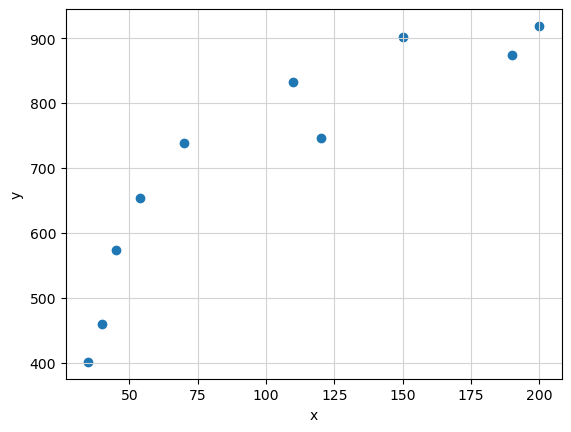

In [37]:
plt.scatter(x, y)
plt.grid(color="lightgrey")
plt.xlabel('x')
plt.ylabel('y');

In [8]:
n=len(y)

w1=(np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
# матожидание произведение св - произведение матожиданий св 
# сумма квадратов произведения св деленое на сумму кв обьясняющей переменой

w0=np.mean(y) - w1 * np.mean(x)
w0, w1

(444.1773573243596, 2.620538882402765)

In [50]:

# альтернативная формула расчет коэфицента наклона как отношение суммы квалдратов остатков xy деленое на сумму кв икс 
Sxx = sum([(el - np.mean(x))**2 for el in x])
yy=np.array([el - np.mean(y) for el in y])
xx=np.array([el - np.mean(x) for el in x])
Sxy = sum(yy*xx)
w1_2= a5/Sxx
w1_2



2.620538882402765

In [10]:
R2 = (w1 * np.std(x) / np.std(y))**2
R2

0.7876386635293682

In [53]:
y_eq=w0+w1*x

In [11]:
y_pred = w0 + w1*x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

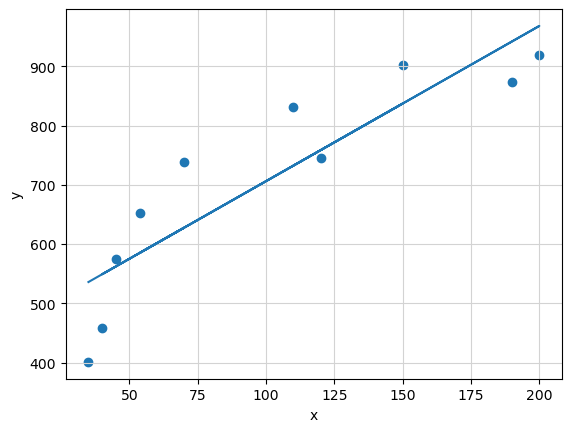

In [55]:
plt.scatter(x,y)
plt.plot(x, y_eq)
plt.grid(color="lightgrey")
plt.xlabel('x')
plt.ylabel('y');
plt.show;

In [73]:
model=LinearRegression()
model.fit(x.reshape(-1,1),y)
score = model.score(x.reshape(-1,1),y)
score, model.intercept_, float(model.coef_)

(0.7876386635293686, 444.17735732435955, 2.6205388824027653)

## Анализ значимости  уравнения линейной регресии и значимости его коэфицентов

### Найдем среднюю ошибку апроксимации

In [56]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

Средняя ошибка апроксимаци больше 8 -10 % хотя и находится близко   
к 10 уравнение плохо описывает эмпирические данные

### Оценки значимости уравнения регрессии
Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера.  
Найдем фактическое значение  F -критерия ( Fфакт ):

In [57]:
n=len(y)
F_fact = (R2 * (n - 2)) / (1 - R2)
F_fact

29.671640859664432

При 5 % уровне значимости и степенях свободы  k1=1  и  k2=10−2=8  (n=10 10 точек)табличное значение критерия:  Fкр=5.32.  
http://univer-nn.ru/econometrica/Fisher-Student-table.pdf  
Так как  Fфакт=29.67>Fкр4.96 , уравнение регрессии статистически значимо.

### Оценка статистической значимости параметров регрессии

$t$-статистикой Стьюдента и также рассчитаем 

доверительные интервалы каждого из показателей. При $df = n - 2 = 10 - 2 = 8$ и $\alpha = 0.05$ получим tкр=2.306

(см. <a href='https://statpsy.ru/t-student/t-test-tablica/'>Таблицу критических значений t-критерия Стьюдента</a>):

Определим стандартную ошибку Sост (переменная s_residual) и случайные ошибки ma,mb:

In [74]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_w1 = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_w0 = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_w1 = {}\nm_w0 = {}'.format(s_residual, m_a, m_b))

s_residual = 89.93340731602925
m_w1 = 56.466497550681524
m_w0 = 0.48108279568516


In [62]:
t_w1 = w1 / m_w1
t_w0 = w0 / m_w0
t_w0, t_w1

(923.286721762229, 0.04640873785470224)

t_w0 (923) < tкр=2.306  
t_w1 (0.04) > tкр=2.306  
Cвободный коэфицент w0 статистически значим а коэфицент наклона нет 

Несмотря на то что уравнение лин регресии стат значимо, его коэф наклона стат не значим при p уровне 0.95 так же величина ср ошибки апроксимации более 10 % говорит о том что скорей всего наблюдается не линейная зависимость. По виду графика можно попробовать прологорифмировать обьяняющую переменую x

In [76]:
x_2 = np.log2(x)
x_2

array([5.12928302, 5.4918531 , 7.56985561, 7.64385619, 5.32192809,
       6.12928302, 5.7548875 , 7.22881869, 6.9068906 , 6.78135971])

In [81]:
model2=LinearRegression()
model2.fit(x_2.reshape(-1,1),y)
score2 = model2.score(x_2.reshape(-1,1),y)
score2, model2.intercept_, float(model2.coef_)

(0.9016967457181473, -468.2960716250428, 184.2139819307578)

Как видим коэфицент детерминации при логарифмировании вырос модель стала лучше описывать данные.

In [80]:
y_eq2 =  float(model2.coef_)*x_2 + model2.intercept_

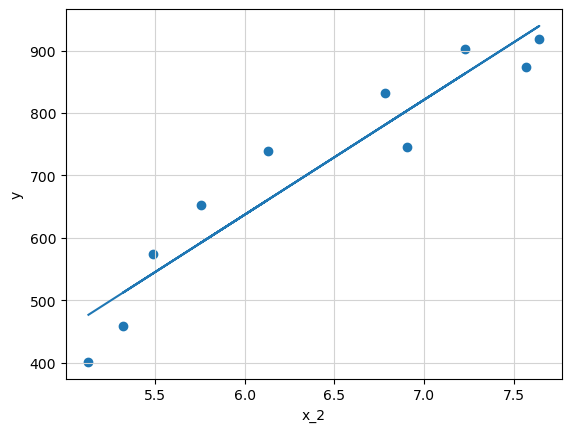

In [82]:
plt.scatter(x_2,y)
plt.plot(x_2, y_eq2)
plt.grid(color="lightgrey")
plt.xlabel('x_2')
plt.ylabel('y');
plt.show;

In [83]:
A_mean = 100 * np.mean(np.abs((y - y_eq2) / y))
A_mean

8.213574278919213

Ошибка апроксимации так же уменшилась, логично что и другие метрики покажут   
лучшый результат возможно стоит взять логарифм с чуть большим основанием например натуральный

# 2
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа,   
а в каких - таблица критических точек распределения Стьюдента?

лаплас там где у нас уже известны параметры гс, а при работе с выборкой исп стьюдента